In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [6]:
 df=pd.read_csv('heart.csv')
 df

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#EDA
1.Null values

duplicates

outliers

datatypes

spaces

encoding


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.isnull().sum().sum()

0

In [16]:
df.duplicated().sum()

1

In [17]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

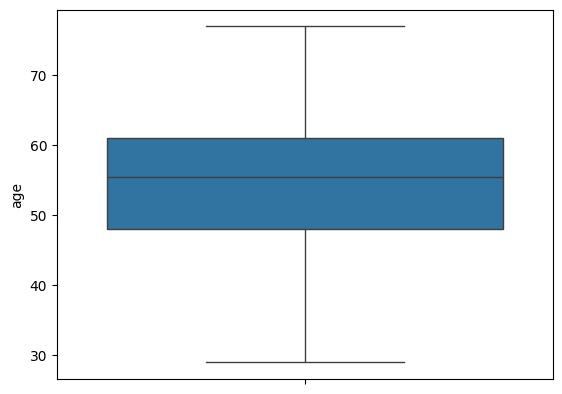

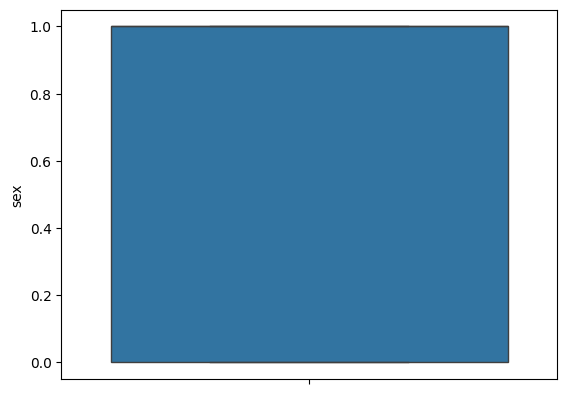

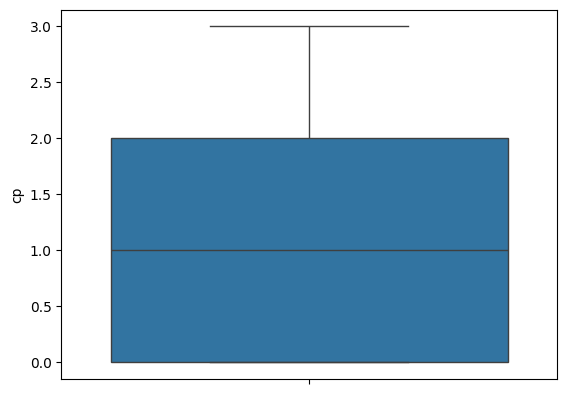

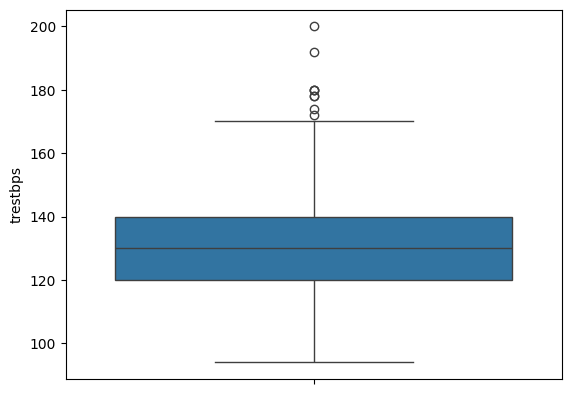

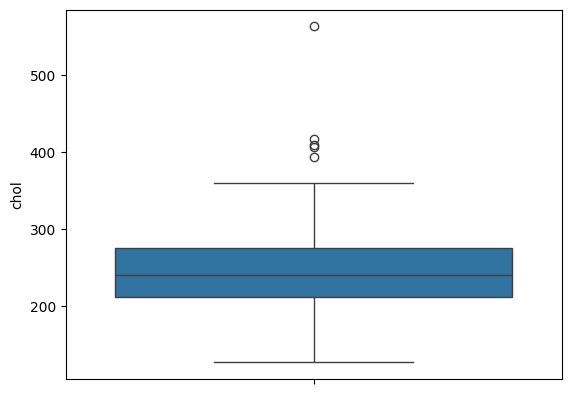

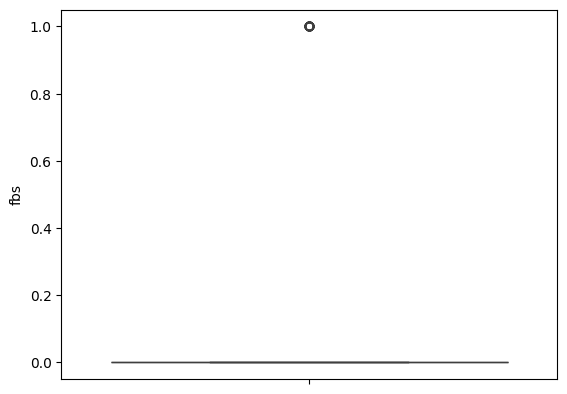

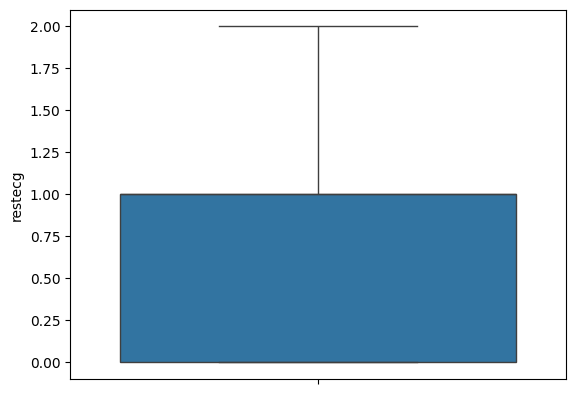

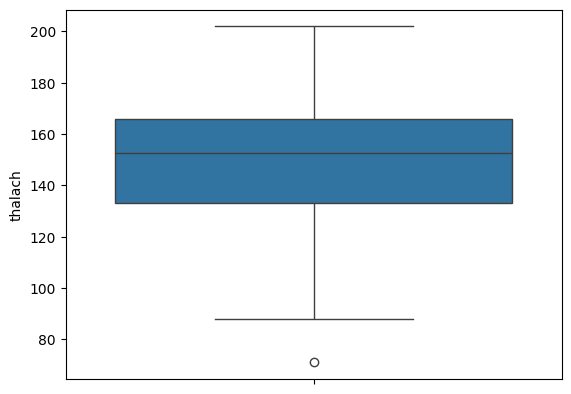

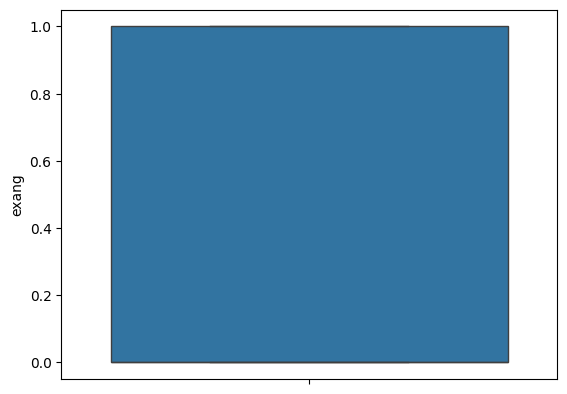

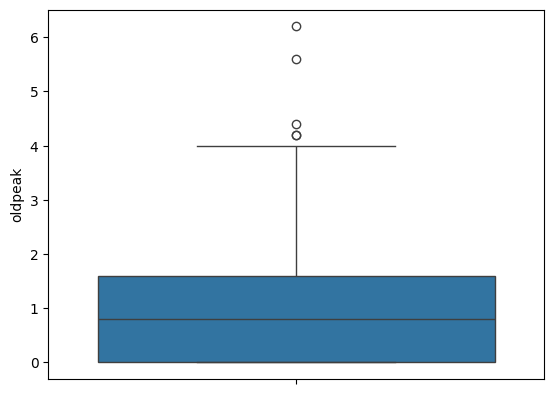

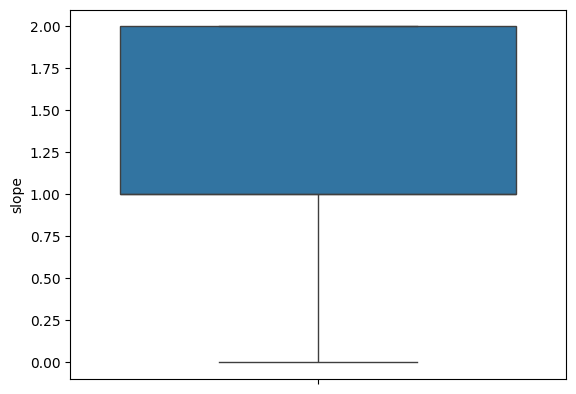

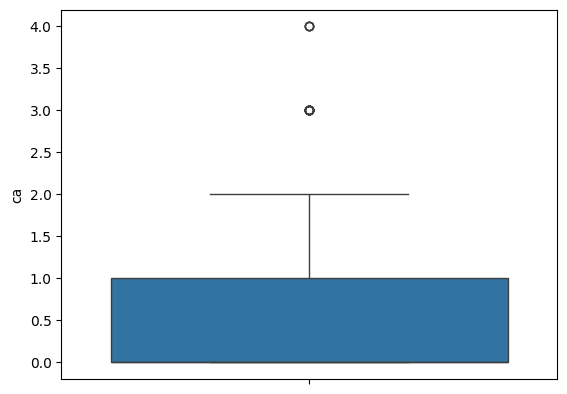

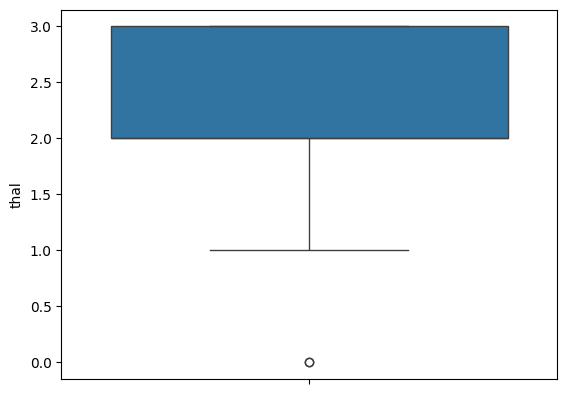

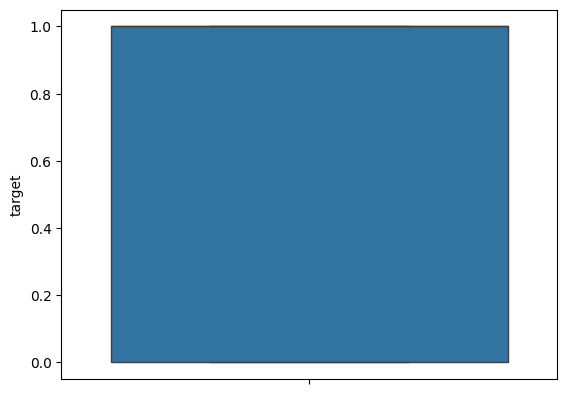

In [28]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix

In [30]:
'''
splitting the data
create model
load the model with training data
pedictions
accuracy and evaluation
'''

'\nsplitting the data\ncreate model\nload the model with training data\npedictions\naccuracy and evaluation\n'

In [33]:
x=df.iloc[:,:-1]
y=df['target']

In [34]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [35]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [38]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=23)

In [39]:
model=DecisionTreeClassifier(random_state=23)

In [41]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=23)

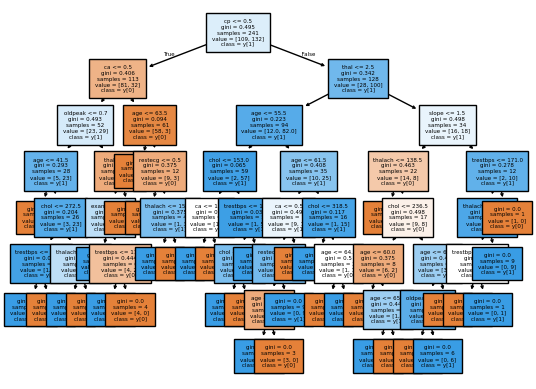

<Figure size 6000x3600 with 0 Axes>

In [62]:
dot_data=plot_tree(model,feature_names=X_train.columns,filled=True,class_names=True,fontsize=4)
plt.figure(figsize=(20, 12),dpi=300)
plt.show()

In [64]:
y_pred=model.predict(X_test)

In [65]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [66]:
accuracy_score(y_test,y_pred)

0.7213114754098361

In [70]:
y_test.shape

(61,)

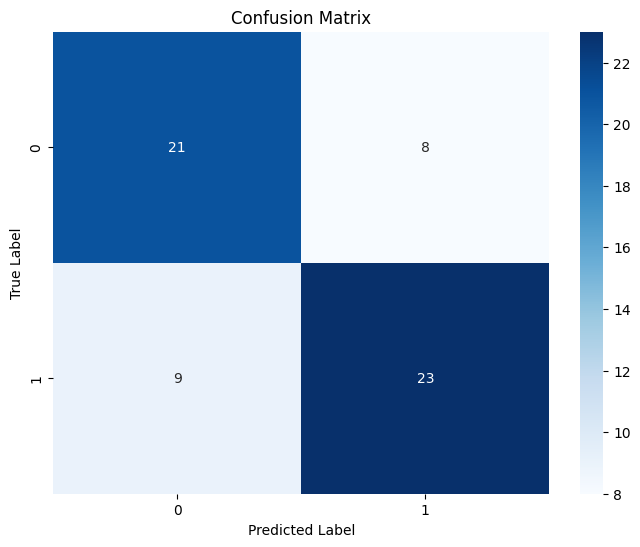

In [69]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [97]:
import random
random_numbers = [random.randint(1, 100) for _ in range(20)]
for i in random_numbers:
  model=DecisionTreeClassifier(max_depth=i,random_state=23)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  y_pred_train=model.predict(X_train)
  a=accuracy_score(y_test,y_pred)
  print(f"test {i}: {a}")
  b=accuracy_score(y_train,y_pred_train)
  print(f"Train {i}: {a}")

test 91: 0.7213114754098361
Train 91: 0.7213114754098361
test 77: 0.7213114754098361
Train 77: 0.7213114754098361
test 19: 0.7213114754098361
Train 19: 0.7213114754098361
test 57: 0.7213114754098361
Train 57: 0.7213114754098361
test 54: 0.7213114754098361
Train 54: 0.7213114754098361
test 78: 0.7213114754098361
Train 78: 0.7213114754098361
test 63: 0.7213114754098361
Train 63: 0.7213114754098361
test 9: 0.7213114754098361
Train 9: 0.7213114754098361
test 64: 0.7213114754098361
Train 64: 0.7213114754098361
test 93: 0.7213114754098361
Train 93: 0.7213114754098361
test 87: 0.7213114754098361
Train 87: 0.7213114754098361
test 71: 0.7213114754098361
Train 71: 0.7213114754098361
test 63: 0.7213114754098361
Train 63: 0.7213114754098361
test 32: 0.7213114754098361
Train 32: 0.7213114754098361
test 81: 0.7213114754098361
Train 81: 0.7213114754098361
test 98: 0.7213114754098361
Train 98: 0.7213114754098361
test 48: 0.7213114754098361
Train 48: 0.7213114754098361
test 51: 0.7213114754098361
Train

In [74]:
a

0.7213114754098361

In [86]:
import random
max_depth=random.randint(1,40)
max_depth

1